In [1]:
# YOLO v8の例
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.info()

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [2]:
img_path = "./test_data/sample_img.jpg"
results = model(img_path)
results


image 1/1 /Users/kizawamasakazu/projects/web-apps/image_recognition_api/test_data/sample_img.jpg: 480x640 1 dog, 34.3ms
Speed: 1.2ms preprocess, 34.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [3]:
for result in results:
    print(result)
    result.plot()
    plt.show()

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

dog 0.88


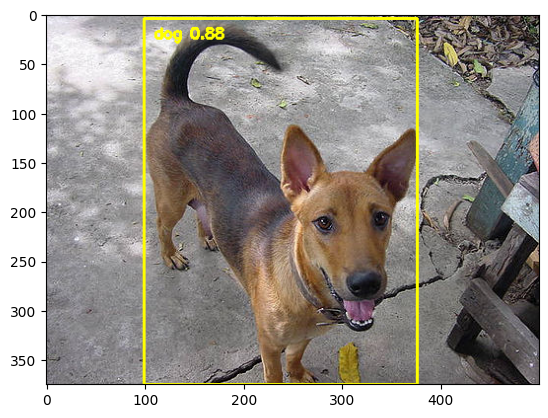

In [4]:
import cv2
import matplotlib.pyplot as plt

def draw_results(image_path: str, results: list[any], model):
    img = cv2.imread(image_path)
    for r in results:
        boxes = r.boxes.xyxy
        confs = r.boxes.conf
        cls_ids = r.boxes.cls.numpy().astype(int)
        for (x1, y1, x2, y2), conf, cid in zip(boxes, confs, cls_ids):
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 255), 2) # RGB
            # ラベル
            label = f"{model.names[cid]} {conf:.2f}"
            print(label)
            cv2.putText(img, label, (int(x1+10), int(y1)+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return

draw_results(img_path, results, model)

In [5]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([16.])
conf: tensor([0.8776])
data: tensor([[ 99.5191,   4.5862, 376.0359, 375.0000,   0.8776,  16.0000]])
id: None
is_track: False
orig_shape: (375, 500)
shape: torch.Size([1, 6])
xywh: tensor([[237.7775, 189.7931, 276.5169, 370.4138]])
xywhn: tensor([[0.4756, 0.5061, 0.5530, 0.9878]])
xyxy: tensor([[ 99.5191,   4.5862, 376.0359, 375.0000]])
xyxyn: tensor([[0.1990, 0.0122, 0.7521, 1.0000]])

In [6]:
frame = results[0].plot()

In [8]:
results[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou